In [43]:
import numpy as np
import pip

import pandas as pd

churn_modeling_df = pd.read_csv('Churn_Modelling.csv')

churn_modeling_df.head()
churn_modeling_df.info()

churn_modeling_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
churn_modeling_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


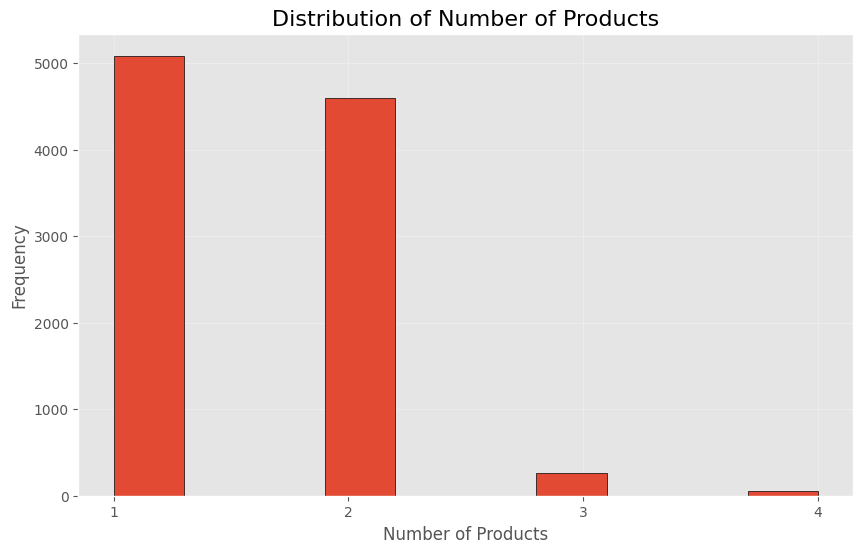

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')

plt.figure(figsize=(10, 6))
churn_modeling_df['NumOfProducts'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Number of Products', fontsize=16)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(1, churn_modeling_df['NumOfProducts'].max() + 1))
plt.grid(True, alpha=0.3)
plt.show()

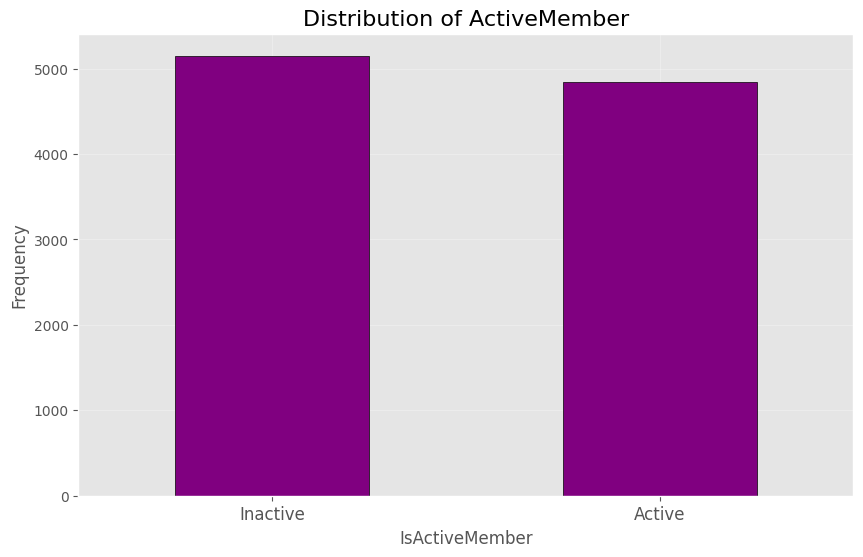

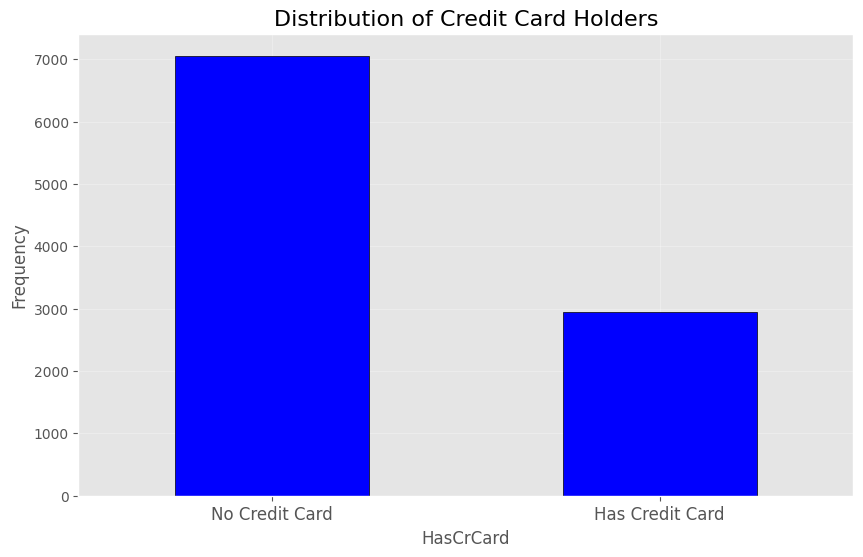

In [46]:
# Convert HasCrCard, IsActiveMember, Exited to categorical
churn_modeling_df['HasCrCard'] = churn_modeling_df['HasCrCard'].astype('category')
churn_modeling_df['IsActiveMember'] = churn_modeling_df['IsActiveMember'].astype('category')
churn_modeling_df['Exited'] = churn_modeling_df['Exited'].astype('category')

plt.figure(figsize=(10, 6))
churn_modeling_df['IsActiveMember'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Distribution of ActiveMember', fontsize=16)
plt.xlabel('IsActiveMember', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], ['Inactive', 'Active'], fontsize=12, rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

# Similarly for HasCrCard
plt.figure(figsize=(10, 6))
churn_modeling_df['HasCrCard'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Credit Card Holders', fontsize=16)
plt.xlabel('HasCrCard', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], ['No Credit Card', 'Has Credit Card'], fontsize=12, rotation=0)
plt.grid(True, alpha=0.3)
plt.show()

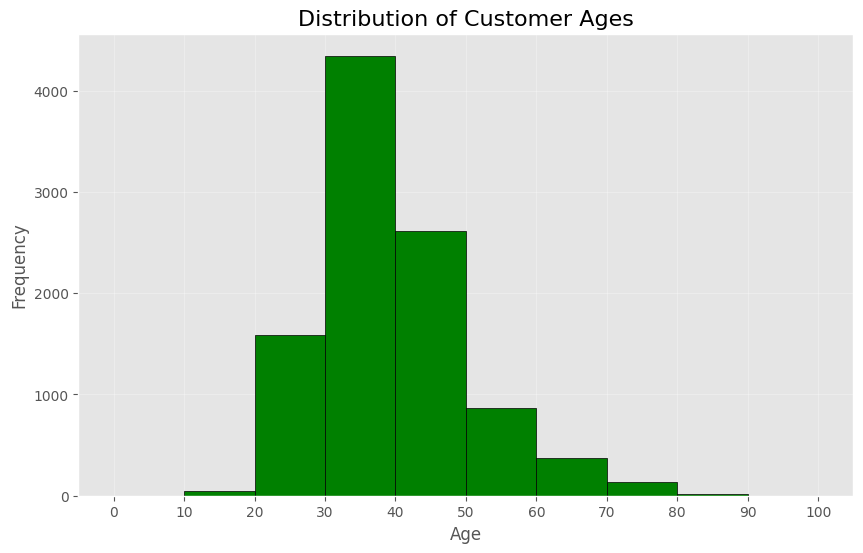

In [47]:
plt.figure(figsize=(10, 6))
churn_modeling_df['Age'].hist(bins=range(0, 101, 10), edgecolor='black', color='green')
plt.title('Distribution of Customer Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 101, 10), fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

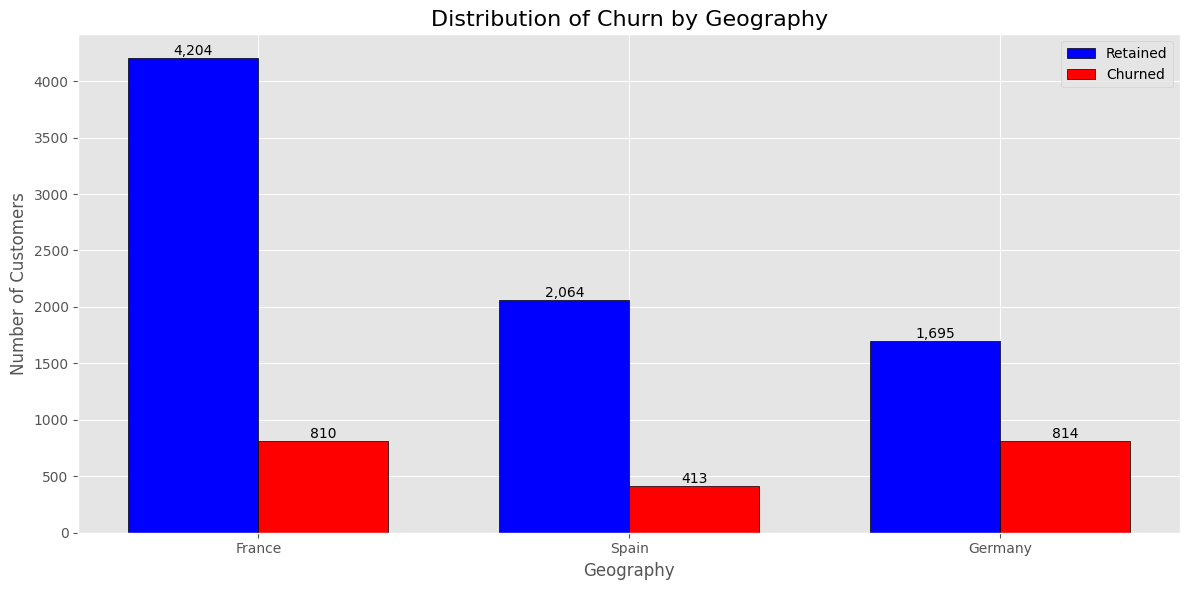

In [48]:
# Get churn data for each geography
geographies = churn_modeling_df['Geography'].unique()
churn_data = {geo: churn_modeling_df[churn_modeling_df['Geography'] == geo]['Exited'].value_counts() for geo in geographies}

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars and positions of the bars on the x-axis
bar_width = 0.35
r1 = np.arange(len(geographies))
r2 = [x + bar_width for x in r1]

# Create bars
retained = ax.bar(r1, [churn_data[geo].get(0, 0) for geo in geographies], color='blue', width=bar_width, label='Retained', edgecolor='black')
churned = ax.bar(r2, [churn_data[geo].get(1, 0) for geo in geographies], color='red', width=bar_width, label='Churned', edgecolor='black')

# Add labels and title
ax.set_xlabel('Geography', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Distribution of Churn by Geography', fontsize=16)
ax.set_xticks([r + bar_width/2 for r in range(len(geographies))])
ax.set_xticklabels(geographies)

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}', ha='center', va='bottom')

add_value_labels(retained)
add_value_labels(churned)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
print(churn_modeling_df.dtypes)


RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object


Random Forest

Best hyperparameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best score: 0.7532250467076744

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1607
           1       0.56      0.60      0.58       393

    accuracy                           0.83      2000
   macro avg       0.73      0.74      0.73      2000
weighted avg       0.83      0.83      0.83      2000


Test accuracy: 0.8270


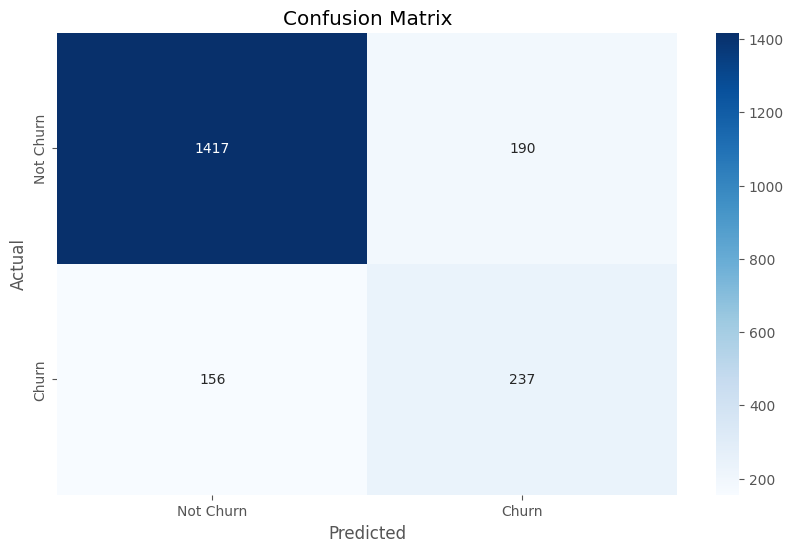

In [58]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import ADASYN  # Import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target
X = churn_modeling_df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = churn_modeling_df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Define hyperparameter tuning space
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__class_weight': ['balanced', None]  # Optional: Add class weight
}

# Create a pipeline with preprocessor, ADASYN, and random forest classifier
rf_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)),  # Using ADASYN for oversampling
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Optional: Add class weight
])

# Perform hyperparameter tuning using GridSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Changed to 10 folds
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=kf, scoring='f1_macro', verbose=0)  # Set verbose to 0
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nTest accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Gradient Boosting


Best hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best score for Gradient Boosting: 0.7588331403101413

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.49      0.59       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Test accuracy for Gradient Boosting: 0.8645


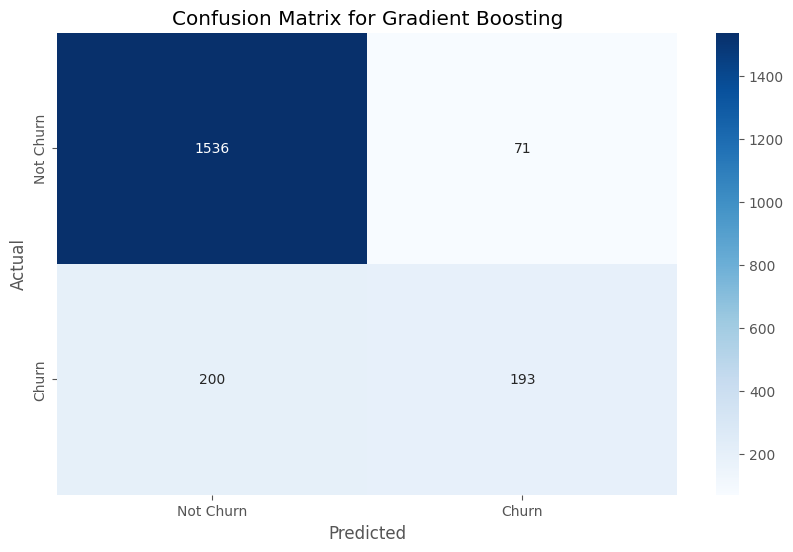

In [59]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a pipeline with preprocessor and gradient boosting classifier
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Set up hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Set up repeated stratified k-fold cross-validation
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Perform grid search for hyperparameter tuning
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=rskf, scoring='f1_macro', verbose=0)
grid_search_gb.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best score for Gradient Boosting:", grid_search_gb.best_score_)

# Make predictions on the test set
y_pred_gb = grid_search_gb.predict(X_test)

# Print the classification report
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Print the final test accuracy
print(f"\nTest accuracy for Gradient Boosting: {accuracy_score(y_test, y_pred_gb):.4f}")


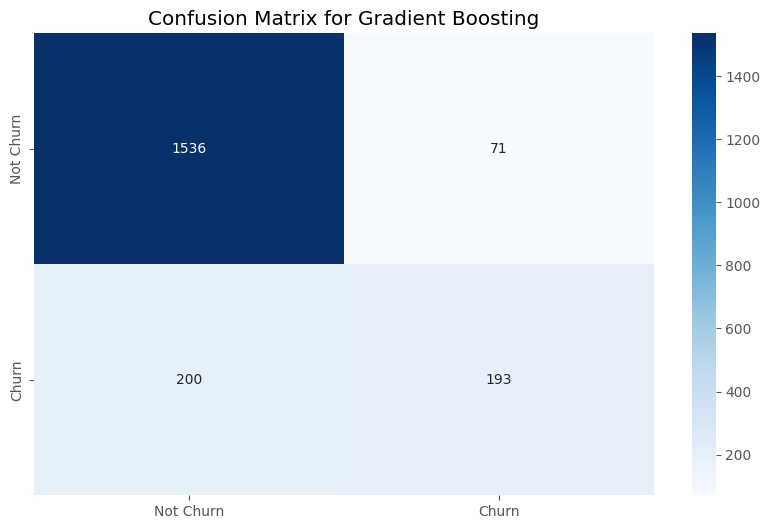

In [61]:
#plot the confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])

plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

good